<h2 align="center"> SINGLE CELLS: </h2>
<h3 align="center"> UMA ANÁLISE DOS TIPOS DE CÉLULA PRESENTES NO INTESTINO  </h3>

<hr>

<p> O intestino é um órgão complexo que promove a digestão, extrai nutrientes, participa na vigilância imunológica, mantém relações simbióticas críticas com a microbiota e afeta a saúde geral. Entender este órgão promove uma melhor analise do comportamento e interação das células que o constituem, entretanto, métodos clássicos de expressão gênica não analisam as interações respeitando o comportamento heterogênico destas, desse modo, a expressão gênica unicelular (scRNA-seq) nos permite uma analise única para determinação do estado, função e resposta celular das células em nível unicelular para mais de milhões de células em um único estudo, permitindo a classificação, distinção e caracterização de cada célula ao nível do transcriptoma. O objetivo deste trabalho é realizar o tratamento de dados do intestino aplicando técnicas de Machine Learning com o datase do Tabula Sapiens.  </p>


<p> O projeto foi elaborado pelos estudantes durante o quarto semestre de graduação da Ilum - Escola de Ciência, para a disciplina de Biomatmática. O grupo é composto pelos estudantes: </p>

<p> 1. Caio Eduardo Palatin  </p>
<p> 2. João Pedro Aroucha de Brito  </p>
<p> 3. Monyque Karoline de Paula Silva </p>
<p align="justify">

<h3 align="="> TRATAMENTO INICIAL DOS DADOS  </h3>


In [1]:
#Importação das bibliotecas
import anndata as ad
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Leitura do primeiro arquivo .h5ad
adata = sc.read_h5ad('large.h5ad')

# Leitura do segundo arquivo .h5ad
adatinha = sc.read_h5ad('small.h5ad')

# Analisa a compatibilidade da estrutura dos dois datasets e se forem compatíveis, realizar o merge com o comando 'concat'
if adata.shape[1] == adatinha.shape[1]:
    
    merged_adata = ad.concat([adata, adatinha], merge='unique')
else:
    print("The AnnData objects have incompatible shapes and cannot be merged.")
    
sc.pp.filter_cells(merged_adata, min_genes=200) #get rid of cells with fewer than 200 genes
sc.pp.filter_genes(merged_adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells

In [3]:
# Intestino Delgado
display(adata)

print()

# Intestino Grosso
display(adatinha)

print()

# União dos datas - sem a expressão gênica (ela não conseguiu ser acoplada)
display(merged_adata)

AnnData object with n_obs × n_vars = 13680 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

AnnData object with n_obs × n_vars = 12467 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

AnnData object with n_obs × n_vars = 26147 × 42949
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'

<h3 align="="> REDUÇÃO DE DIMENSIONALIDADE  </h3>


In [4]:
merged_adata.X

<26147x42949 sparse matrix of type '<class 'numpy.float32'>'
	with 53258742 stored elements in Compressed Sparse Row format>

<h3 align="="> PCA - CAIO  </h3>


In [5]:
# Inserir código caio aqui

<h3 align="="> UMAP  </h3>
<p> O UMAP é uma técnica de redução de dimensão que pode ser usada para visualização de forma semelhante ao t-SNE (ferramenta para visualizar dados de alta dimensão que converte semelhanças entre pontos de dados em probabilidades conjuntas e tenta minimizar a divergência de Kullback-Leibler entre as probabilidades conjuntas da incorporação de baixa dimensão e dos dados de alta dimensão), mas também para redução geral de dimensão não linear.  </p>
<p> Ele é muito utilizado em dados de single-cell devido a alta dimensionalidade por possuir milhares de contagem de expressão gênica por célula individual e conseguir reduzi-las a duas ou três dimensões para que cada célula obtenha uma localização em um gráfico bi ou tridimensional. </p>
<p> De acordo com o próprio UMAP, "Os conjuntos de dados de sequenciamento de RNA unicelular são tão vastos e multidimensionais que, como pesquisador, você não pode simplesmente tentar encontrar um padrão biologicamente significativo lendo seus milhões de pontos de dados. O UMAP foi projetado para ajudar a visualizar as informações para que você possa ver e exibir padrões em seus dados com mais facilidade. Dessa forma, os pontos que formam clusters em um gráfico UMAP podem ser potencialmente interpretados como (sub)tipos de células separadas". </p>


/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


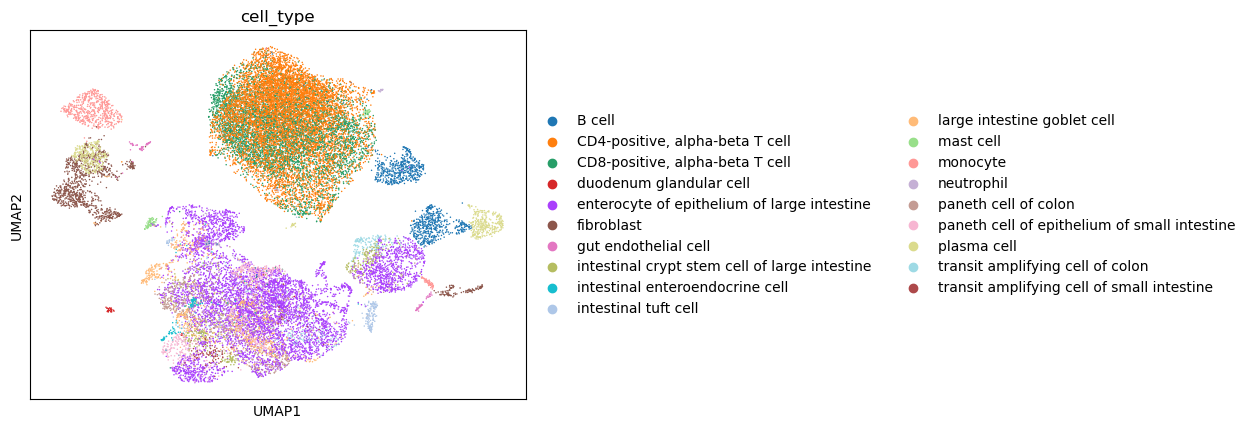

In [6]:
# Aplicação do UMAP
sc.pl.umap(merged_adata, color='cell_type')

<h3 align="="> LEIDEN  </h3>

<p>Utilização do agrupamento pelo algorítmo leiden, o qual é usado para agrupar células semelhantes com base em seus perfis de expressão gênica e a conectividade entre elas. O algoritmo tenta encontrar agrupamentos de células que são mais densamente conectados entre si do que com células de outros agrupamentos. </p>

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


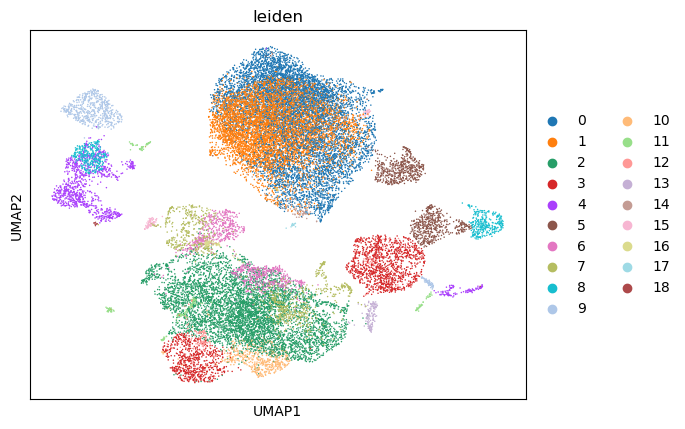

In [7]:
sc.pp.neighbors(merged_adata)
sc.tl.leiden(merged_adata, resolution = 0.30)
sc.pl.umap(merged_adata, color=['leiden'])

<h3 align="="> ENCONTRE MARCADORES GENÉTICOS  </h3>


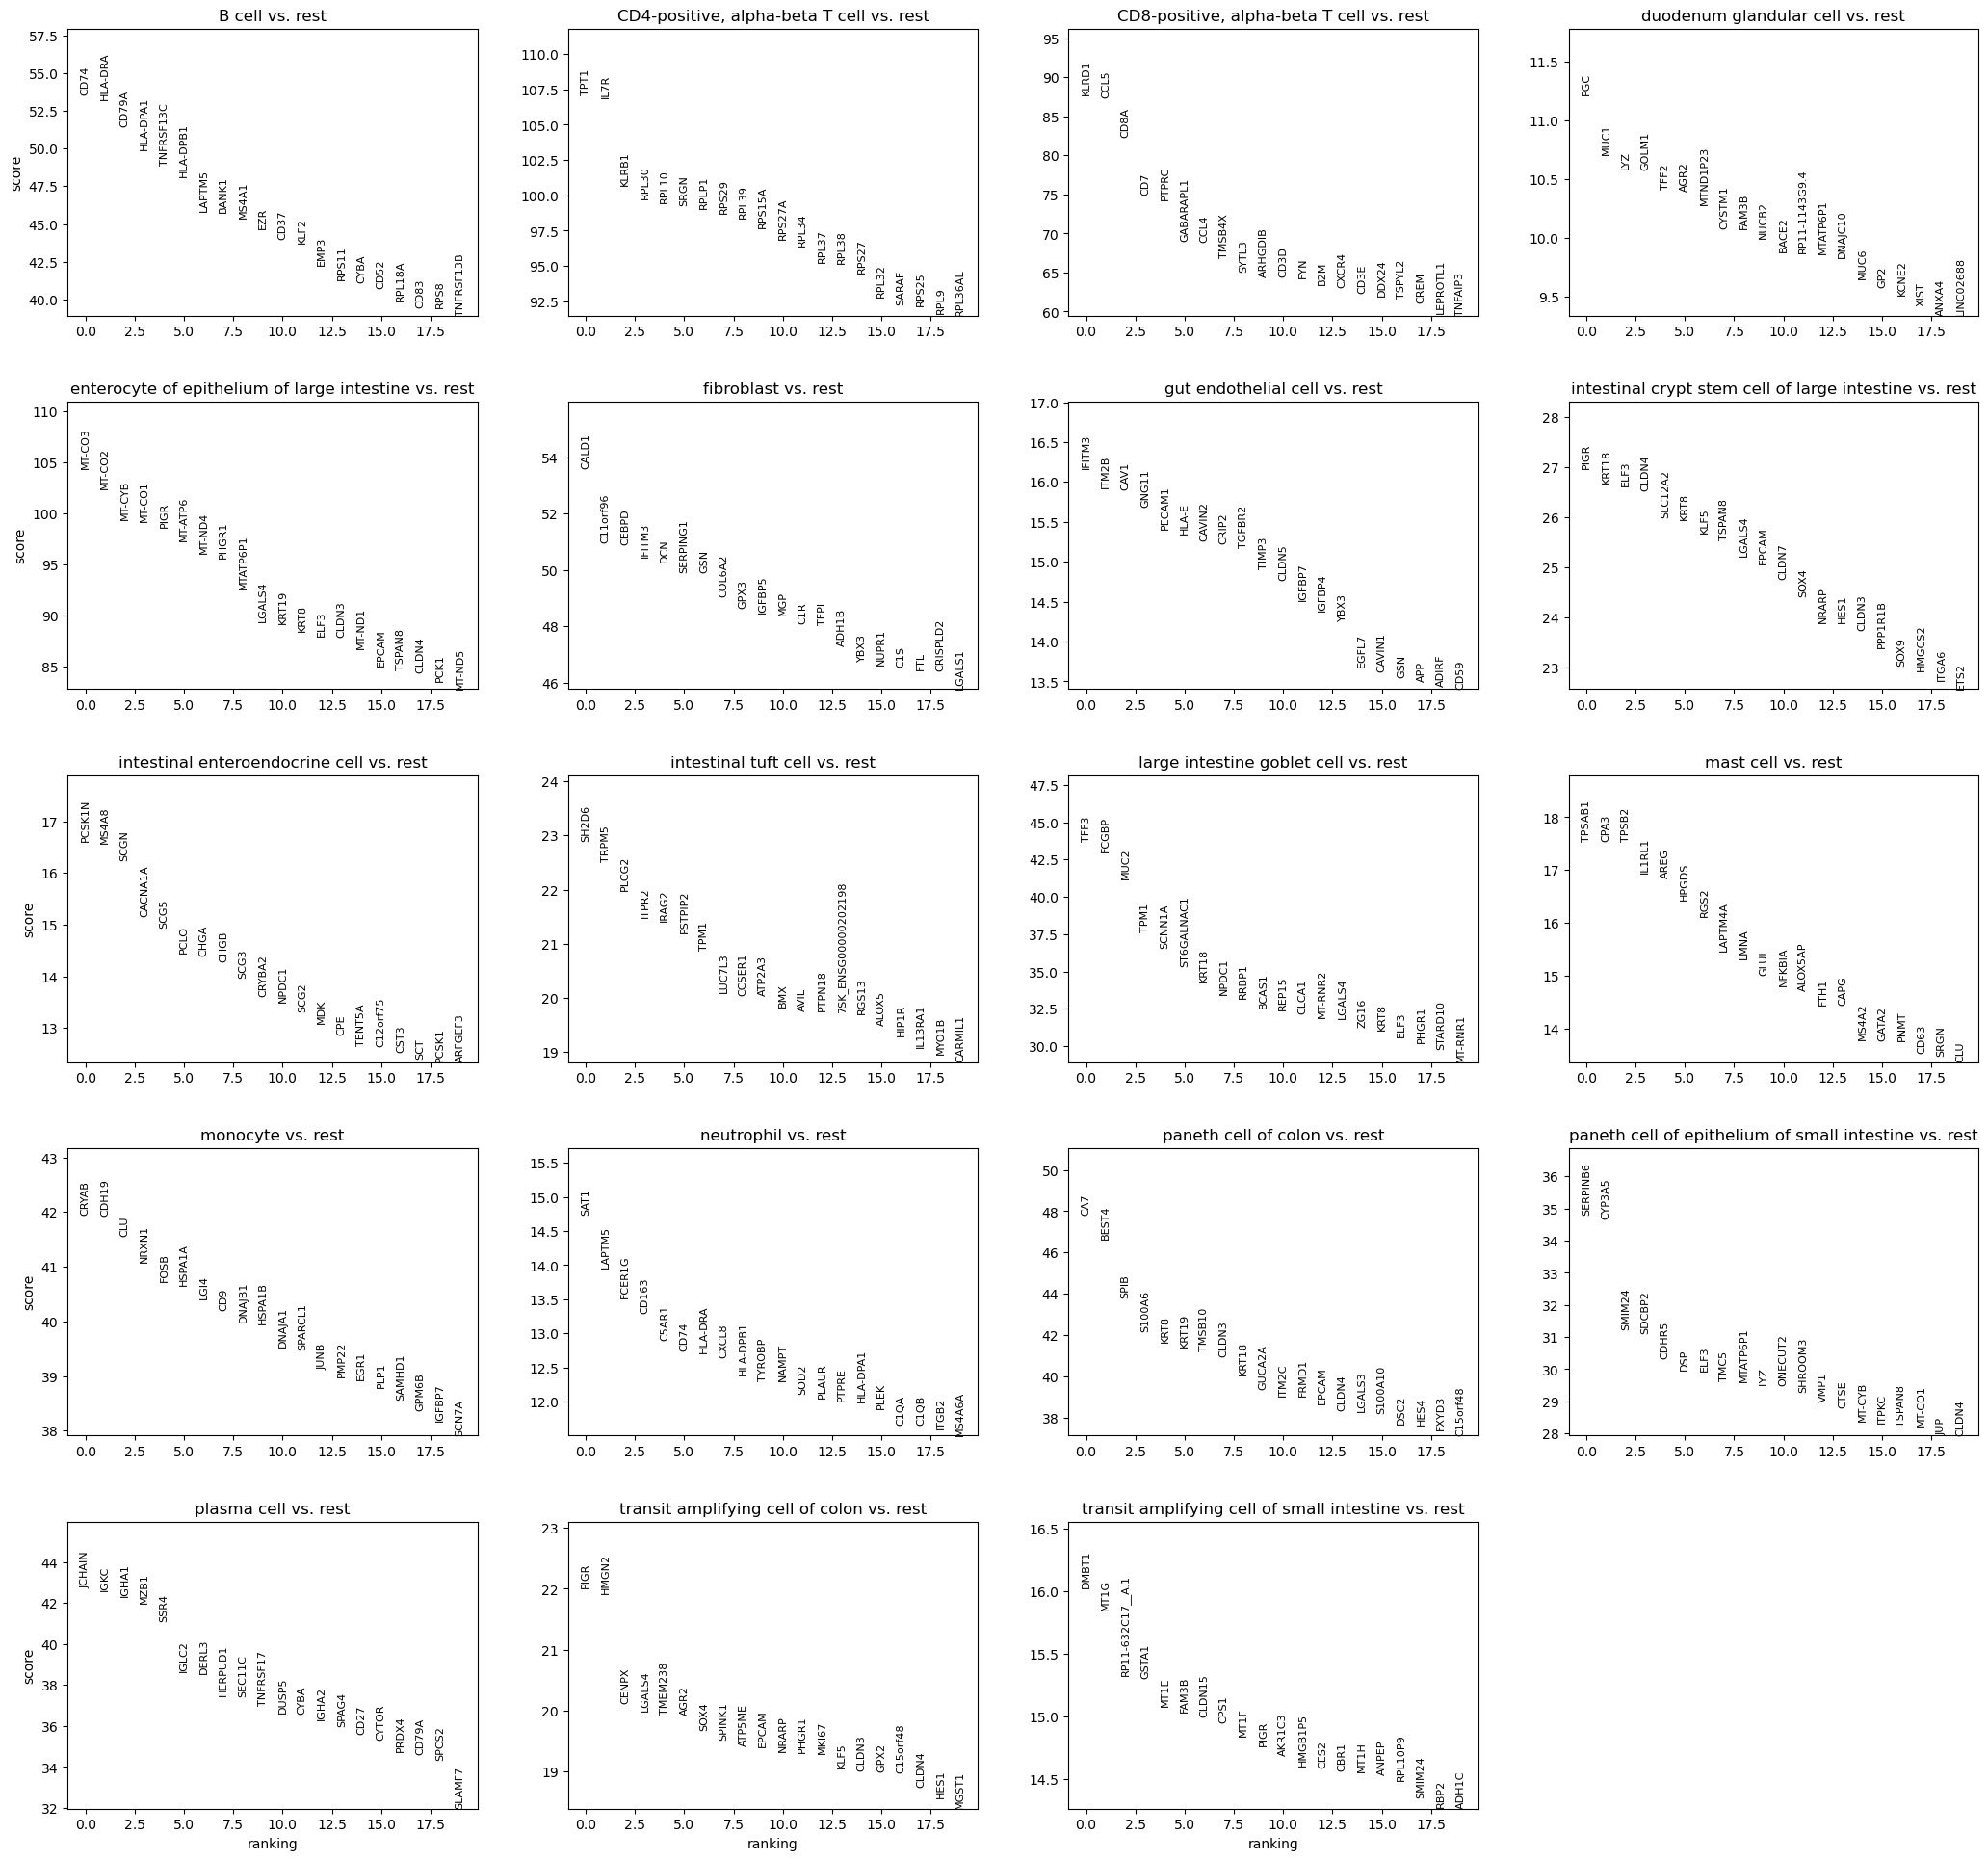

In [8]:
sc.pp.log1p(merged_adata)
sc.tl.rank_genes_groups(merged_adata, 'cell_type', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(merged_adata, sharey=False, show=False, use_raw=False, gene_symbols='feature_name')

marker_genes = {}
fig = plt.gcf()
for ax in fig.axes:
    title = ax.get_title().split(' vs. ')[0]
    gene_symbol = ax.get_children()[0].get_text()
    marker_genes[title] = gene_symbol

### GENES MAIS EXPRESSOS

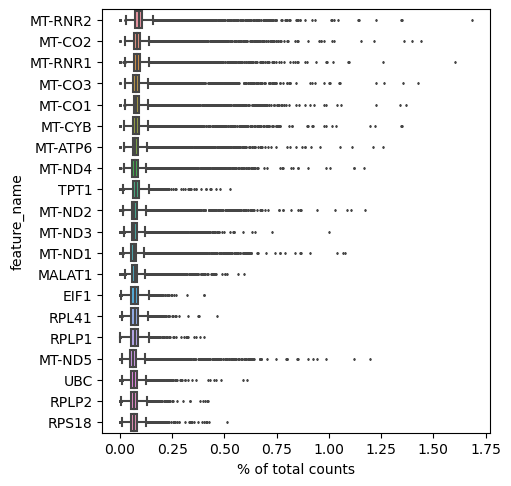

In [9]:
sc.pl.highest_expr_genes(merged_adata, n_top=20, gene_symbols='feature_name')

### DENDROGRAMA DE TIPOS CELULARES

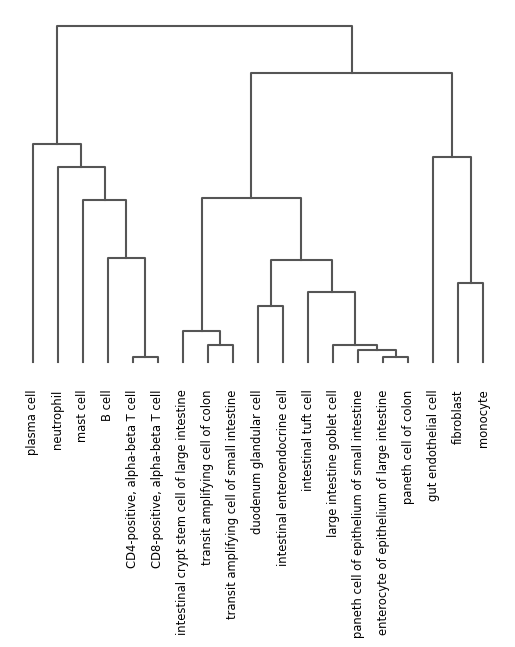

In [10]:
sc.tl.dendrogram(merged_adata, 'cell_type')
sc.pl.dendrogram(merged_adata, 'cell_type')
plt.show()

### DOTPLOT

/home/ABTLUS/joao220047/anaconda3/envs/BM/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


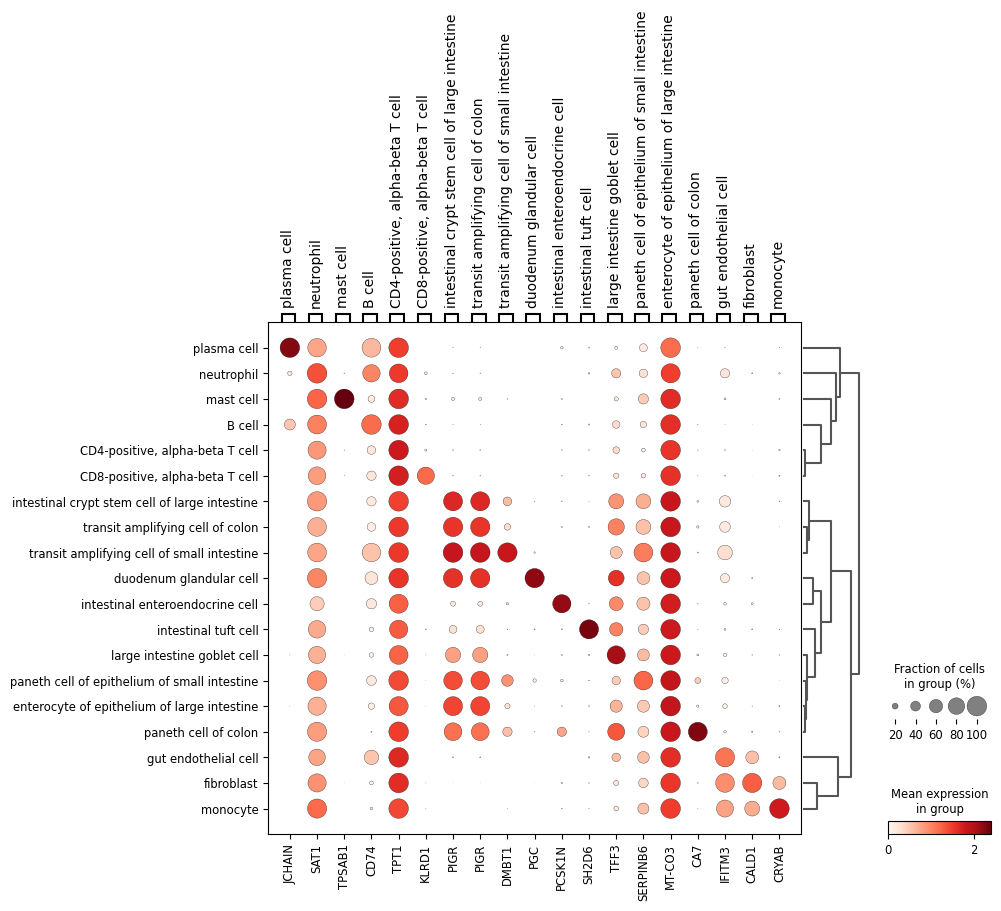

In [15]:
sc.pl.dotplot(merged_adata, marker_genes, groupby='cell_type', dendrogram=True, use_raw=False, gene_symbols='feature_name')

### MATRIXPLOT

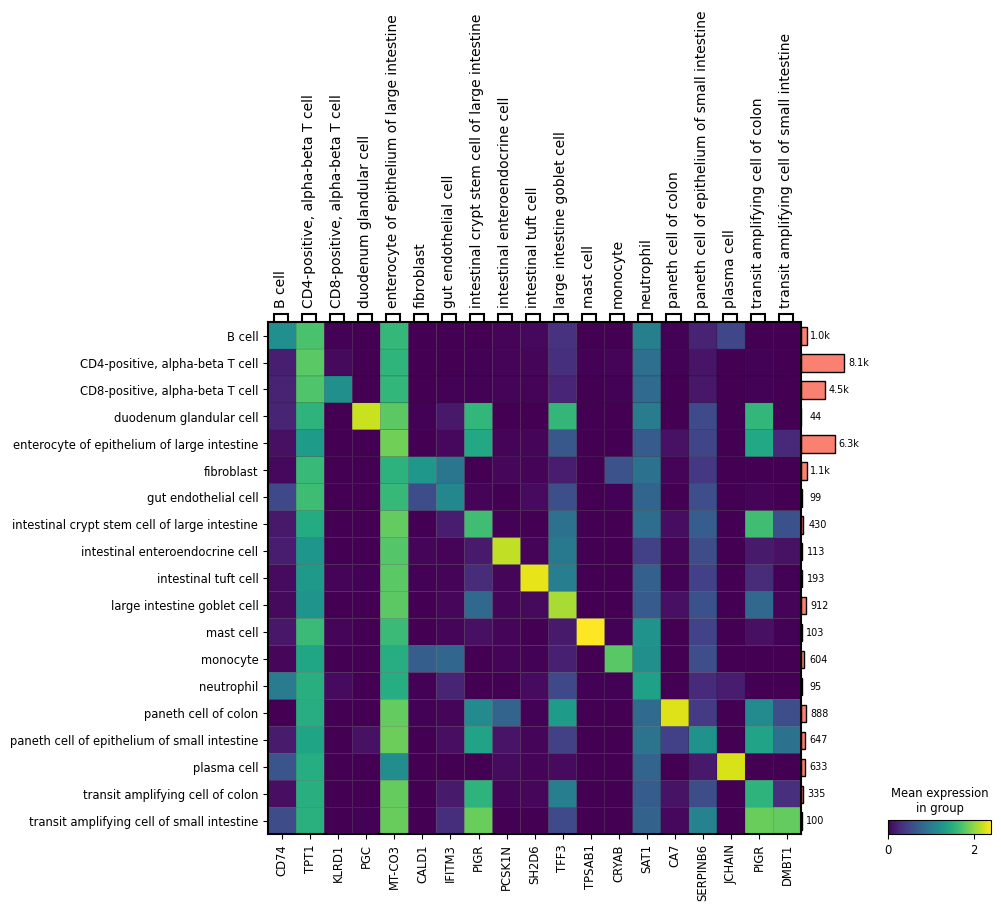

In [28]:
mp = sc.pl.matrixplot(merged_adata, marker_genes, 'cell_type', return_fig=True, use_raw=False, gene_symbols='feature_name')
mp.add_totals().style(edge_color='black').show()

### HEATMAP

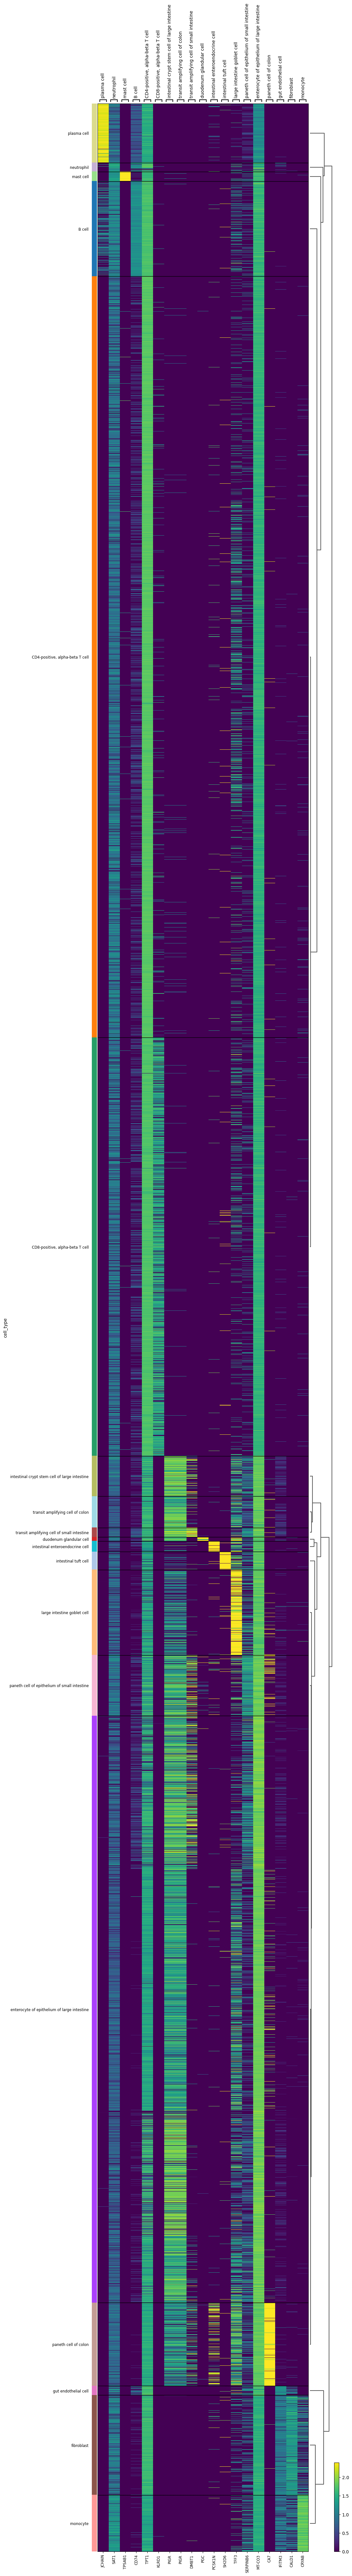

In [22]:
sc.pl.heatmap(merged_adata, marker_genes, groupby='cell_type', dendrogram=True, use_raw=False, gene_symbols='feature_name', figsize=(10, 100))

### TRACKSPLOT

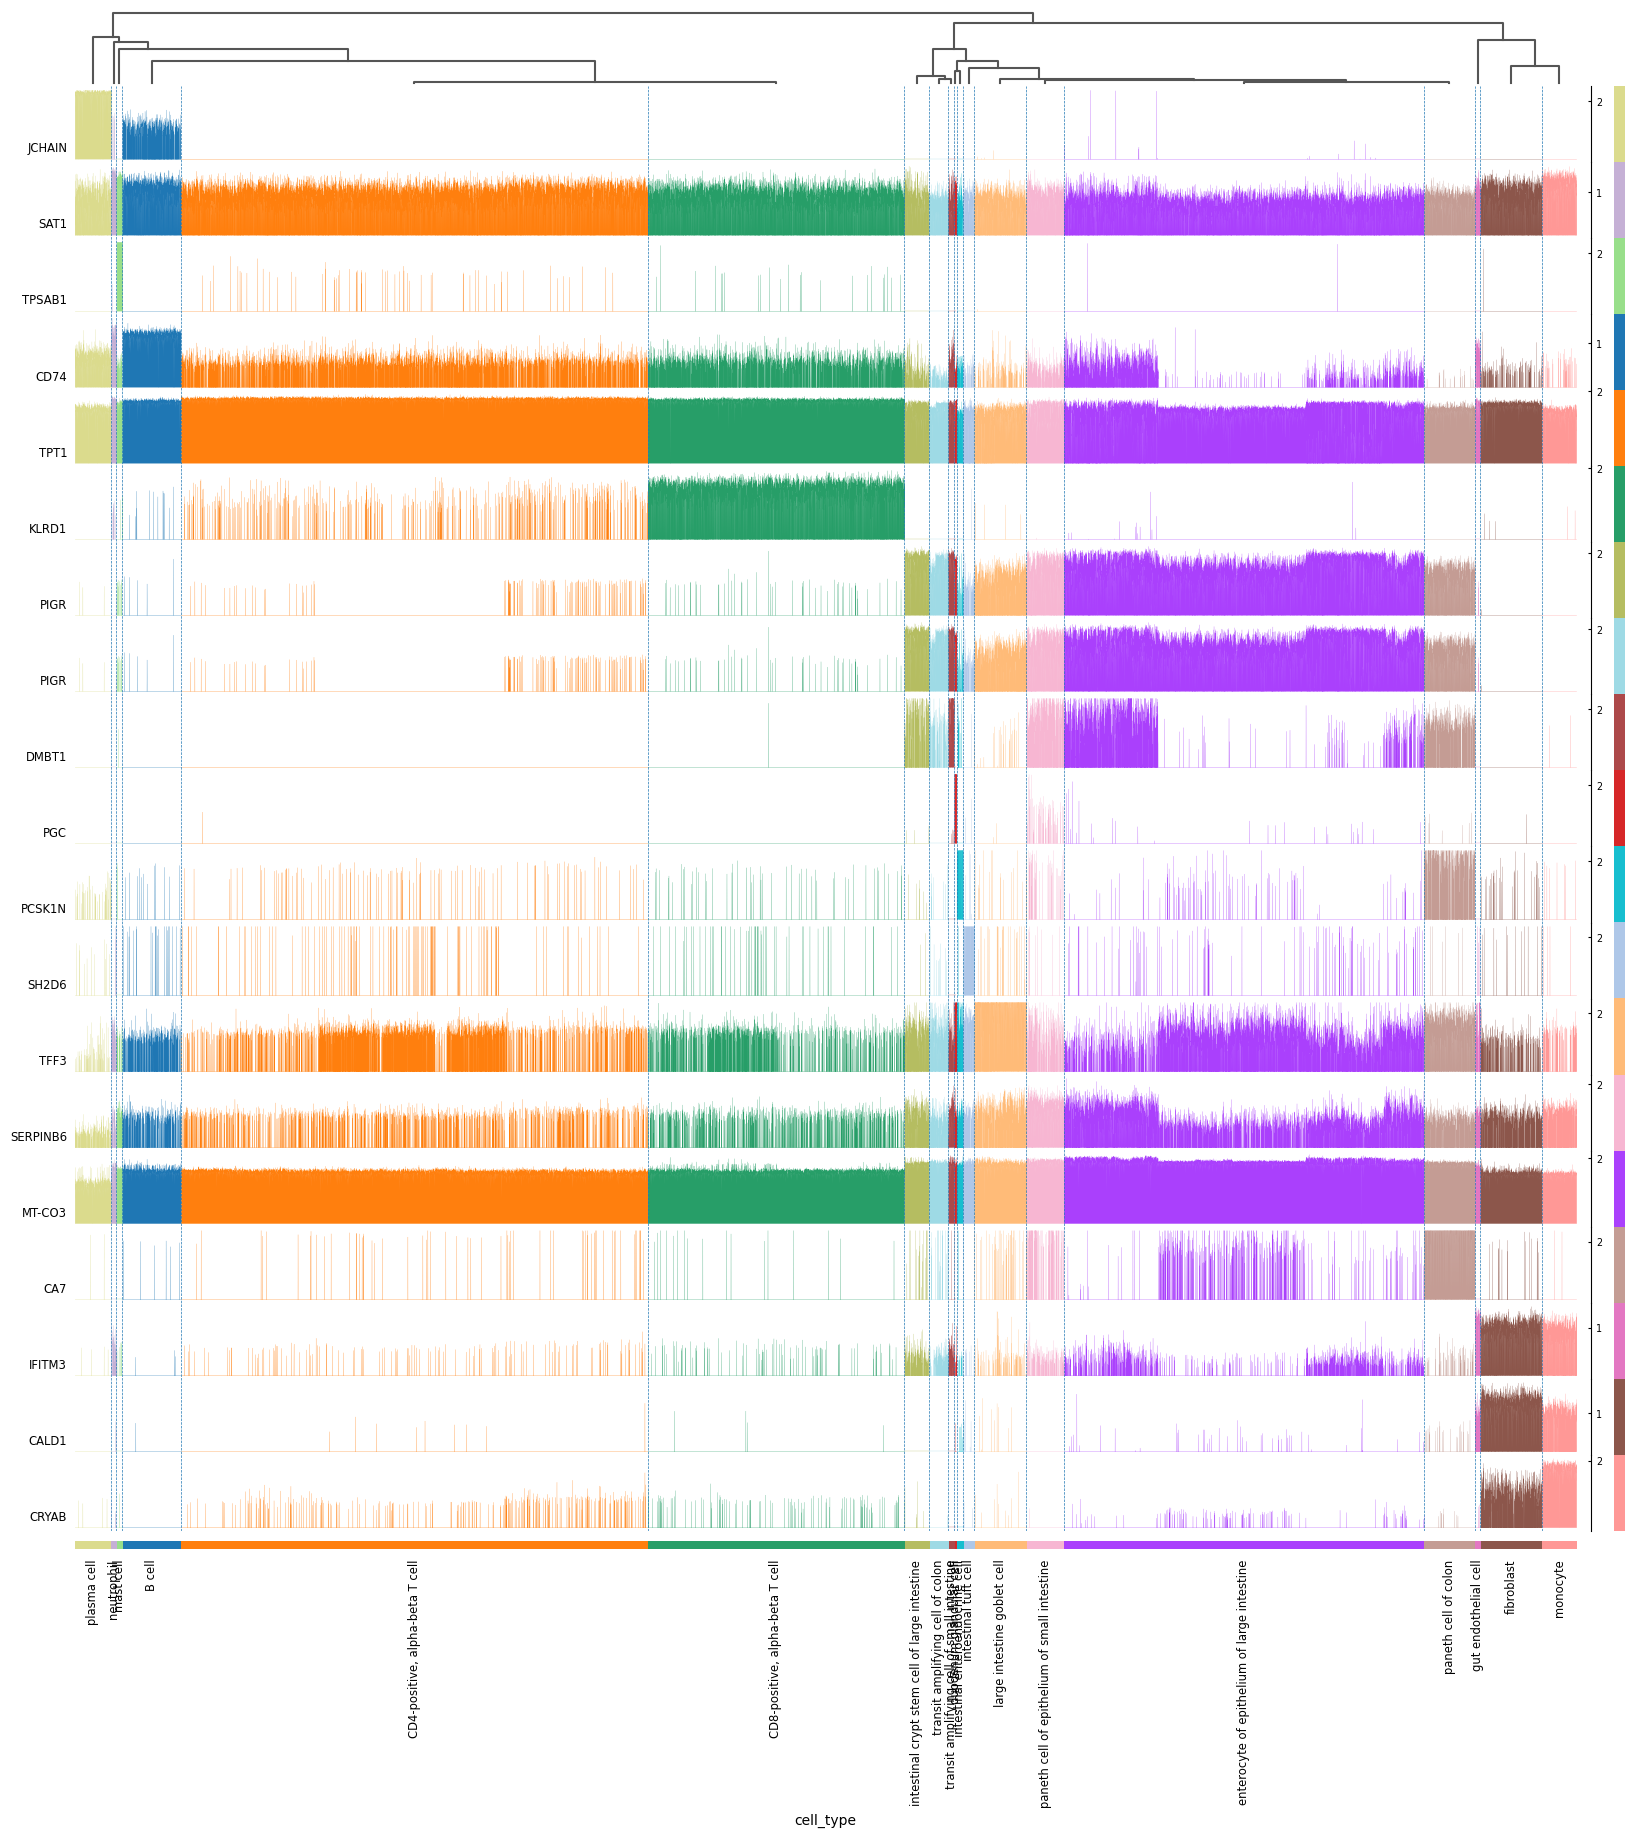

In [25]:
sc.pl.tracksplot(merged_adata, marker_genes, groupby='cell_type', dendrogram=True, use_raw=False, gene_symbols='feature_name', figsize=(20, 20))

<h3 align="="> CLUSTER  </h3>
